In [1]:
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [63]:
from sklearn.model_selection import train_test_split


def create_dataset(size: int=60):
    df = pd.read_csv('Datasets/sonar.all-data', header=None)
    df = df.values

    X = df[:,0:size].astype(float)
    Y = df[:,60]

    encoder = LabelEncoder()
    encoder.fit(Y)
    encoded_Y = encoder.transform(Y)

    
    return df, X, encoded_Y

In [64]:
df, X, y = create_dataset()

In [65]:
print(len(df), len(X), len(y), sep='\n')

208
208
208


In [5]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [6]:
def create_error_report(model_N_layers, dataset=create_dataset(), metrics: str = 'accuracy', epochs: int = 100, batch_size: int = 10, validation_split: float = 0.1):
    X_train_in = dataset[1]
    y_train_in = dataset[2]

    history = model_N_layers.fit(X_train_in, y_train_in, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
    history_df = pd.DataFrame(history.history)

    fig, axes = plt.subplots(1, 2, figsize=(15,7))

    sns.lineplot(data=history_df[f'val_{metrics}'], ax=axes[0])
    axes[0].set_title(metrics)

    sns.lineplot(data=history_df['val_loss'], ax=axes[1])
    axes[1].set_title('Loss')


    return history_df
    

Epoch 1/100


C:\Users\sanya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5117 - loss: 0.6954 - val_accuracy: 0.0000e+00 - val_loss: 0.7083
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6124 - loss: 0.6840 - val_accuracy: 0.0000e+00 - val_loss: 0.7227
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6727 - loss: 0.6746 - val_accuracy: 0.0952 - val_loss: 0.7264
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7036 - loss: 0.6682 - val_accuracy: 0.3810 - val_loss: 0.6961
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7100 - loss: 0.6539 - val_accuracy: 0.1905 - val_loss: 0.7435
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7487 - loss: 0.6379 - val_accuracy: 0.2857 - val_loss: 0.7296
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7608 - loss: 0.6113 - val_accuracy: 0.2857 - val_loss: 0.7443
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7380 - loss: 0.6015 - val_accuracy: 0.3810 - val_

,accuracy,loss,val_accuracy,val_loss
0,0.577540,0.691522,0.000000,0.708337
1,0.604278,0.683731,0.000000,0.722673
2,0.614973,0.677826,0.095238,0.726384
3,0.711230,0.665061,0.380952,0.696087
4,0.684492,0.655471,0.190476,0.743523
...,...,...,...,...
95,0.877005,0.296493,0.809524,0.397731
96,0.887701,0.295755,0.809524,0.430938
97,0.877005,0.292322,0.809524,0.346318
98,0.882353,0.290466,0.809524,0.423479


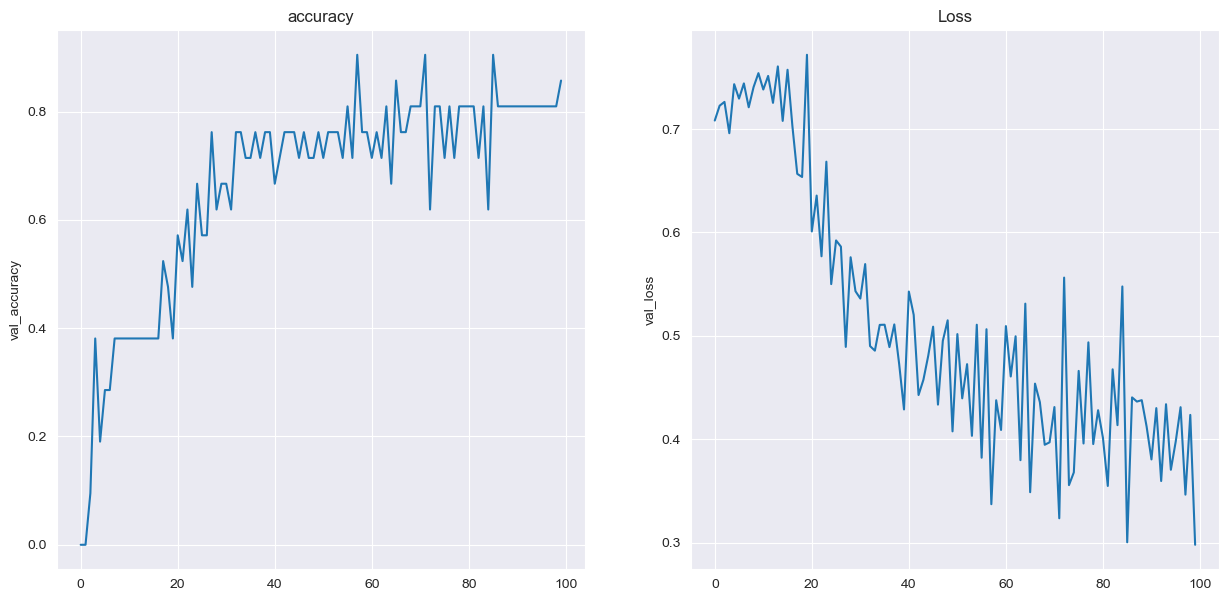

In [7]:
baseline_model = Sequential()
baseline_model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100


C:\Users\sanya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5456 - loss: 0.6890 - val_accuracy: 0.0000e+00 - val_loss: 0.7333
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5530 - loss: 0.6872 - val_accuracy: 0.2381 - val_loss: 0.7004
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7066 - loss: 0.6798 - val_accuracy: 0.0000e+00 - val_loss: 0.7294
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6874 - loss: 0.6715 - val_accuracy: 0.2381 - val_loss: 0.7093
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6827 - loss: 0.6688 - val_accuracy: 0.3333 - val_loss: 0.7056
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7424 - loss: 0.6553 - val_accuracy: 0.2857 - val_loss: 0.7170
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7170 - loss: 0.6437 - val_accuracy: 0.3810 - val_loss: 0.7038
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7342 - loss: 0.6399 - val_accuracy: 0.3810 - val_

,accuracy,loss,val_accuracy,val_loss
0,0.518717,0.690953,0.000000,0.733321
1,0.625668,0.686002,0.238095,0.700445
2,0.663102,0.679681,0.000000,0.729383
3,0.684492,0.672426,0.238095,0.709320
4,0.721925,0.663779,0.333333,0.705642
...,...,...,...,...
95,0.844920,0.357392,0.809524,0.435050
96,0.850267,0.351171,0.714286,0.444878
97,0.828877,0.353408,0.761905,0.441801
98,0.866310,0.351418,0.809524,0.425554


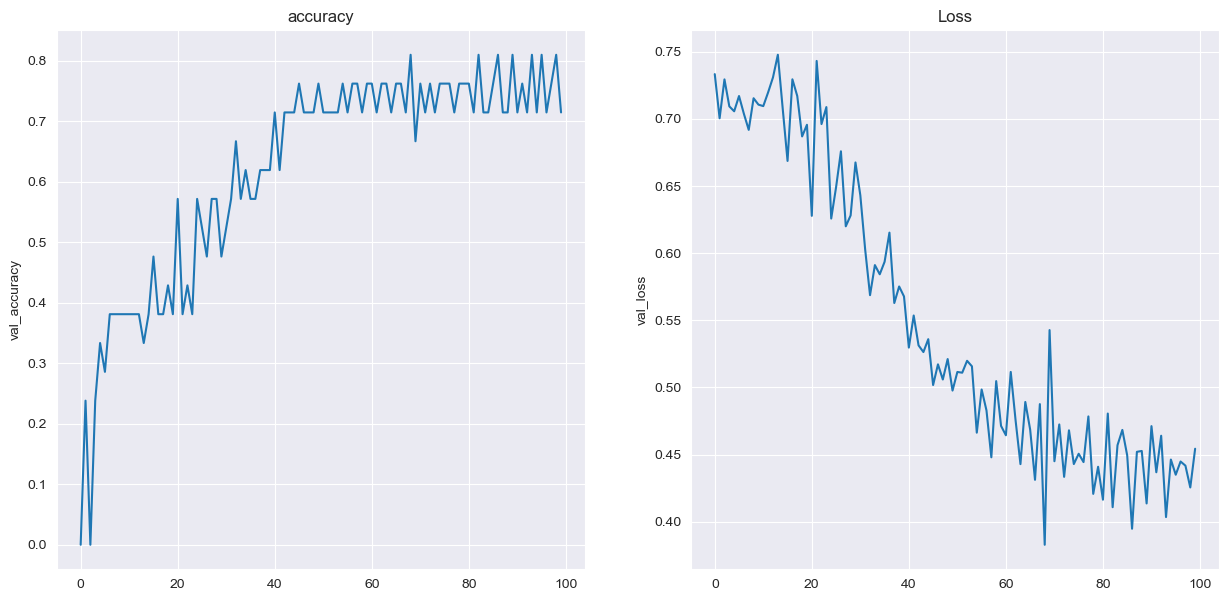

In [8]:
baseline_model = Sequential()
baseline_model.add(Dense(30, input_dim=60, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100


C:\Users\sanya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5140 - loss: 0.6930 - val_accuracy: 0.0476 - val_loss: 0.6949
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6204 - loss: 0.6921 - val_accuracy: 0.0000e+00 - val_loss: 0.7017
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5864 - loss: 0.6905 - val_accuracy: 0.0000e+00 - val_loss: 0.7025
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6535 - loss: 0.6885 - val_accuracy: 0.0000e+00 - val_loss: 0.7202
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6503 - loss: 0.6834 - val_accuracy: 0.0000e+00 - val_loss: 0.7148
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7395 - loss: 0.6707 - val_accuracy: 0.2857 - val_loss: 0.7126
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7516 - loss: 0.6552 - val_accuracy: 0.2857 - val_loss: 0.7266
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7705 - loss: 0.6279 - val_accuracy: 0.285

,accuracy,loss,val_accuracy,val_loss
0,0.540107,0.693010,0.047619,0.694876
1,0.540107,0.692135,0.000000,0.701678
2,0.588235,0.690455,0.000000,0.702451
3,0.663102,0.687310,0.000000,0.720160
4,0.668449,0.682618,0.000000,0.714762
...,...,...,...,...
95,0.951872,0.186880,0.904762,0.205511
96,0.951872,0.183389,0.904762,0.227897
97,0.941176,0.184444,0.904762,0.269536
98,0.957219,0.184552,0.904762,0.247378


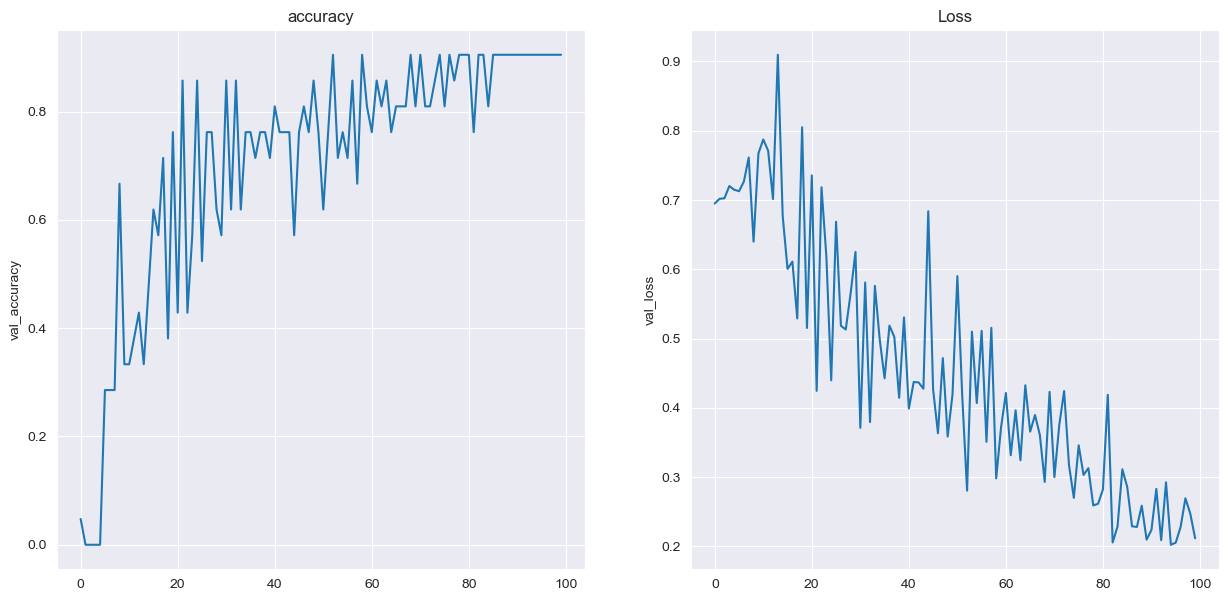

In [9]:
baseline_model = Sequential()
baseline_model.add(Dense(30, input_dim=60, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(15, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5201 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.6973
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5626 - loss: 0.6926 - val_accuracy: 0.0000e+00 - val_loss: 0.6984
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5283 - loss: 0.6927 - val_accuracy: 0.0000e+00 - val_loss: 0.6996
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5278 - loss: 0.6924 - val_accuracy: 0.0000e+00 - val_loss: 0.7017
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5009 - loss: 0.6918 - val_accuracy: 0.0000e+00 - val_loss: 0.7074
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5745 - loss: 0.6868 - val_accuracy: 0.0000e+00 - val_loss: 0.7166
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5077 - loss: 0.6862 - val_accuracy: 0.0000e+00 - val_loss: 0.7376
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5081 - loss: 0.68

,accuracy,loss,val_accuracy,val_loss
0,0.497326,0.693275,0.000000,0.697316
1,0.518717,0.692981,0.000000,0.698445
2,0.518717,0.692792,0.000000,0.699554
3,0.518717,0.692344,0.000000,0.701682
4,0.518717,0.691130,0.000000,0.707390
...,...,...,...,...
95,0.909091,0.265620,0.904762,0.262464
96,0.866310,0.315707,0.904762,0.290913
97,0.909091,0.270013,0.809524,0.401717
98,0.919786,0.262407,0.809524,0.495794


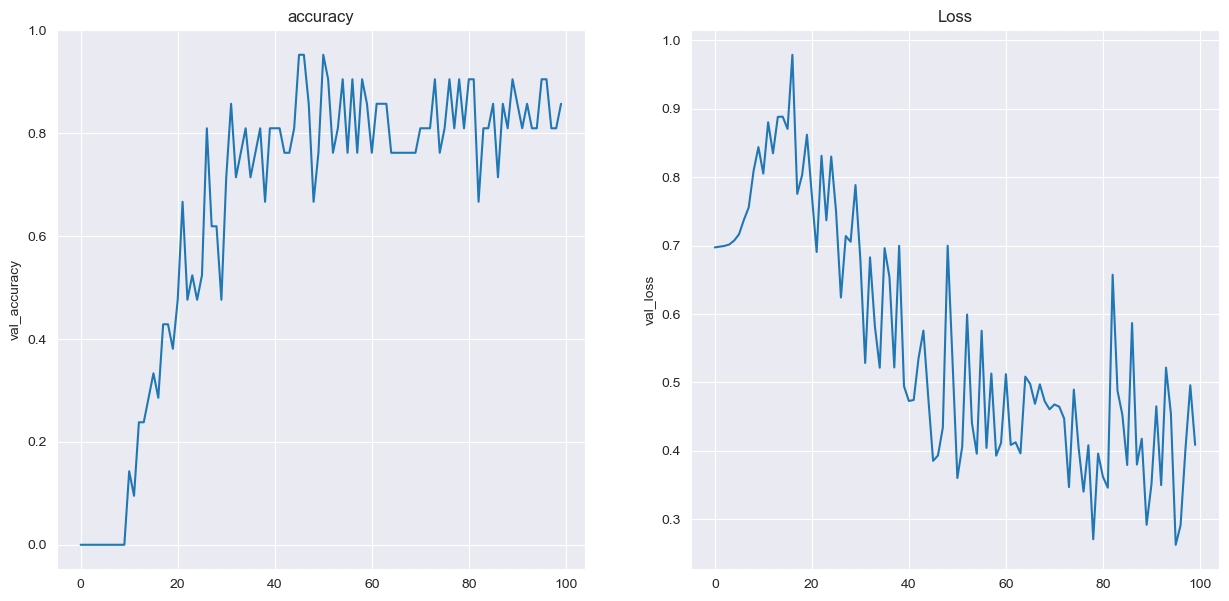

In [10]:
baseline_model = Sequential()
baseline_model.add(Dense(45, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(5, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(3, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.4891 - loss: 0.6933 - val_accuracy: 1.0000 - val_loss: 0.6910
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5102 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.6937
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5084 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.6968
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4921 - loss: 0.6932 - val_accuracy: 0.0000e+00 - val_loss: 0.7001
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5669 - loss: 0.6922 - val_accuracy: 0.0000e+00 - val_loss: 0.7041
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5239 - loss: 0.6927 - val_accuracy: 0.0000e+00 - val_loss: 0.7043
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5359 - loss: 0.6923 - val_accuracy: 0.0000e+00 - val_loss: 0.7049
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4829 - loss: 0.6933 -

,accuracy,loss,val_accuracy,val_loss
0,0.481283,0.693336,1.000000,0.691046
1,0.497326,0.693162,0.000000,0.693692
2,0.518717,0.693048,0.000000,0.696823
3,0.518717,0.692980,0.000000,0.700106
4,0.518717,0.693005,0.000000,0.704113
...,...,...,...,...
95,0.919786,0.264473,0.809524,0.524997
96,0.930481,0.256366,0.714286,0.674482
97,0.903743,0.273259,0.714286,0.766955
98,0.887701,0.276080,0.809524,0.520070


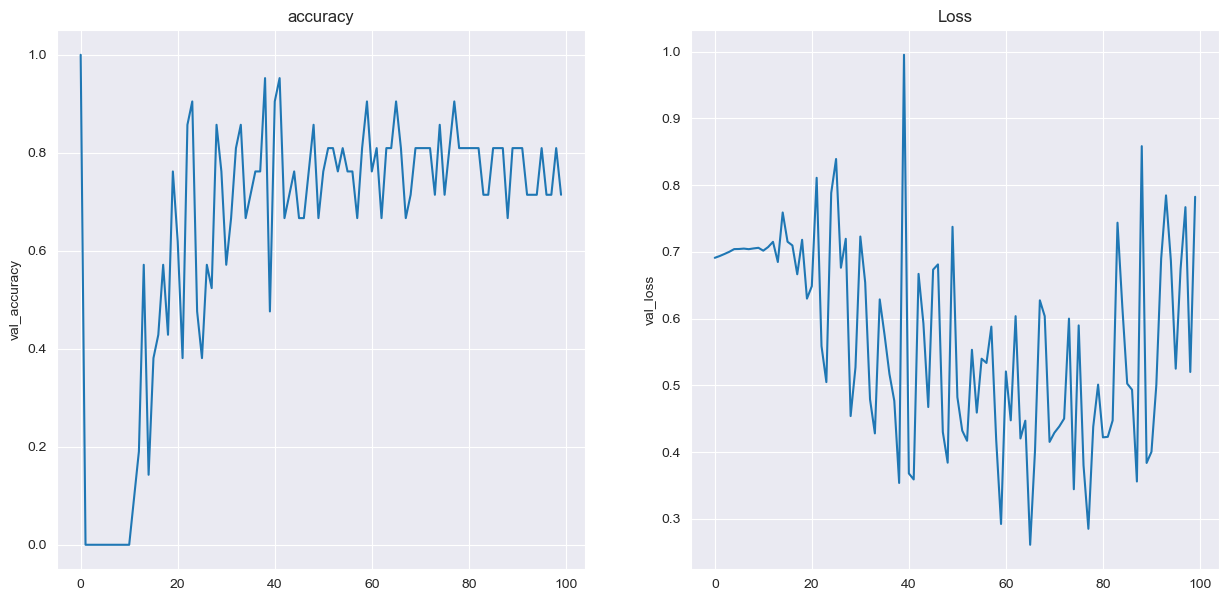

In [11]:
baseline_model = Sequential()
baseline_model.add(Dense(45, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(5, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(10, kernel_initializer='normal', activation='sigmoid'))
baseline_model.add(Dense(3, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5243 - loss: 0.6932 - val_accuracy: 0.0000e+00 - val_loss: 0.6947
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5126 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.6970
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5456 - loss: 0.6928 - val_accuracy: 0.0000e+00 - val_loss: 0.6979
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5037 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.6985
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5453 - loss: 0.6927 - val_accuracy: 0.0000e+00 - val_loss: 0.7006
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5258 - loss: 0.6928 - val_accuracy: 0.0000e+00 - val_loss: 0.7017
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4959 - loss: 0.6933 - val_accuracy: 0.0000e+00 - val_loss: 0.7015
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4884 - loss: 0.69

,accuracy,loss,val_accuracy,val_loss
0,0.518717,0.693128,0.000000,0.694704
1,0.518717,0.693102,0.000000,0.696956
2,0.518717,0.693047,0.000000,0.697903
3,0.518717,0.692992,0.000000,0.698533
4,0.518717,0.692990,0.000000,0.700631
...,...,...,...,...
95,0.914438,0.326319,0.761905,0.618137
96,0.919786,0.326066,0.761905,0.683262
97,0.909091,0.328312,0.857143,0.572164
98,0.909091,0.331808,0.952381,0.490646


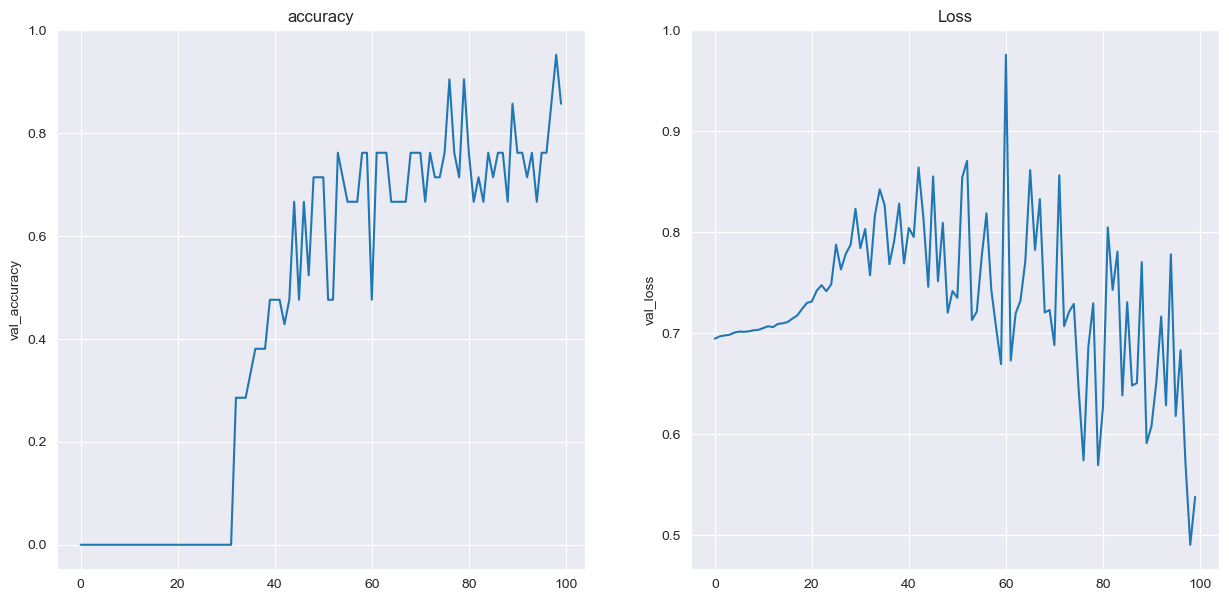

In [12]:
baseline_model = Sequential()
baseline_model.add(Dense(45, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(5, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(2, kernel_initializer='normal', activation='sigmoid'))
baseline_model.add(Dense(4, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4514 - loss: 0.6933 - val_accuracy: 0.0000e+00 - val_loss: 0.7025
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5527 - loss: 0.6920 - val_accuracy: 0.9048 - val_loss: 0.6891
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6414 - loss: 0.6887 - val_accuracy: 0.5238 - val_loss: 0.6904
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6821 - loss: 0.6785 - val_accuracy: 0.7619 - val_loss: 0.6789
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7237 - loss: 0.6556 - val_accuracy: 0.0952 - val_loss: 0.7502
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7538 - loss: 0.6106 - val_accuracy: 0.3810 - val_loss: 0.7086
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7638 - loss: 0.5642 - val_accuracy: 0.2857 - val_loss: 0.8185
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7299 - loss: 0.5198 - val_accuracy: 0.857

,accuracy,loss,val_accuracy,val_loss
0,0.465241,0.693546,0.000000,0.702512
1,0.614973,0.690659,0.904762,0.689110
2,0.695187,0.686287,0.523810,0.690391
3,0.684492,0.676279,0.761905,0.678928
4,0.700535,0.651060,0.095238,0.750181
...,...,...,...,...
95,0.962567,0.099258,0.952381,0.119609
96,0.989305,0.077846,1.000000,0.070993
97,0.989305,0.078186,1.000000,0.050773
98,0.978610,0.081588,1.000000,0.042784


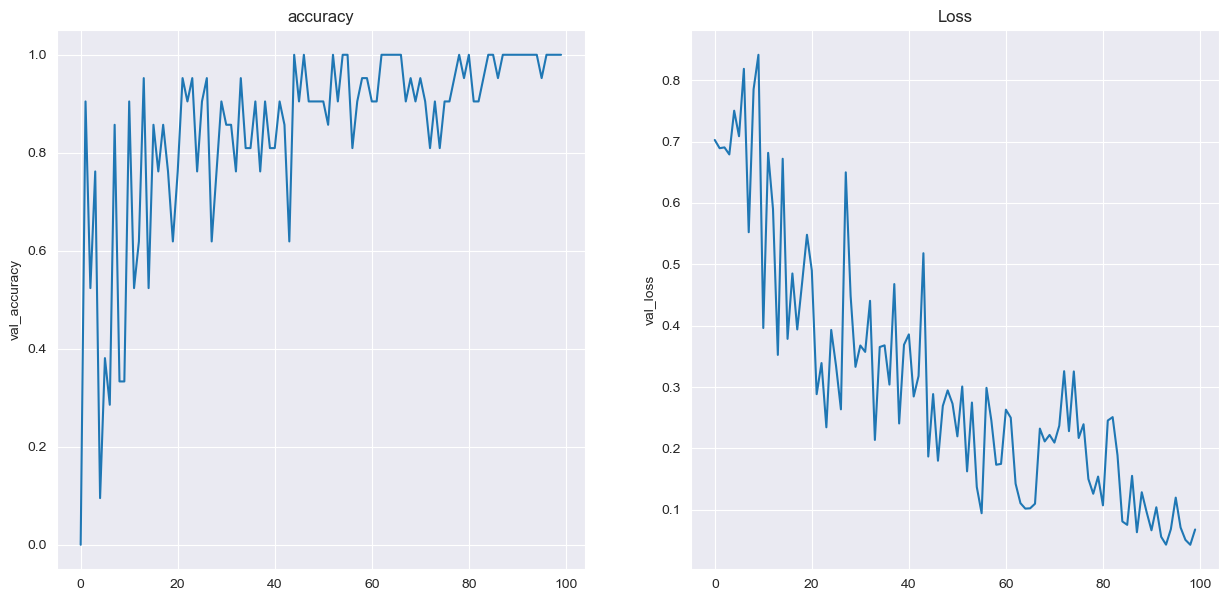

In [13]:
baseline_model = Sequential()
baseline_model.add(Dense(60, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(40, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5378 - loss: 0.6927 - val_accuracy: 0.0000e+00 - val_loss: 0.7066
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5348 - loss: 0.6911 - val_accuracy: 0.0000e+00 - val_loss: 0.7133
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6178 - loss: 0.6848 - val_accuracy: 0.0000e+00 - val_loss: 0.7290
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7127 - loss: 0.6752 - val_accuracy: 0.0000e+00 - val_loss: 0.7607
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6990 - loss: 0.6638 - val_accuracy: 0.0476 - val_loss: 0.7704
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7120 - loss: 0.6351 - val_accuracy: 0.0000e+00 - val_loss: 0.8334
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7644 - loss: 0.5967 - val_accuracy: 0.2381 - val_loss: 0.8232
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7577 - loss: 0.5770 - val

,accuracy,loss,val_accuracy,val_loss
0,0.518717,0.692596,0.000000,0.706597
1,0.609626,0.689440,0.000000,0.713283
2,0.631016,0.684154,0.000000,0.729022
3,0.711230,0.672514,0.000000,0.760687
4,0.727273,0.653590,0.047619,0.770418
...,...,...,...,...
95,0.914438,0.209221,0.666667,0.803586
96,0.930481,0.206292,0.571429,0.843728
97,0.941176,0.199916,0.666667,0.596844
98,0.925134,0.230855,0.571429,0.917893


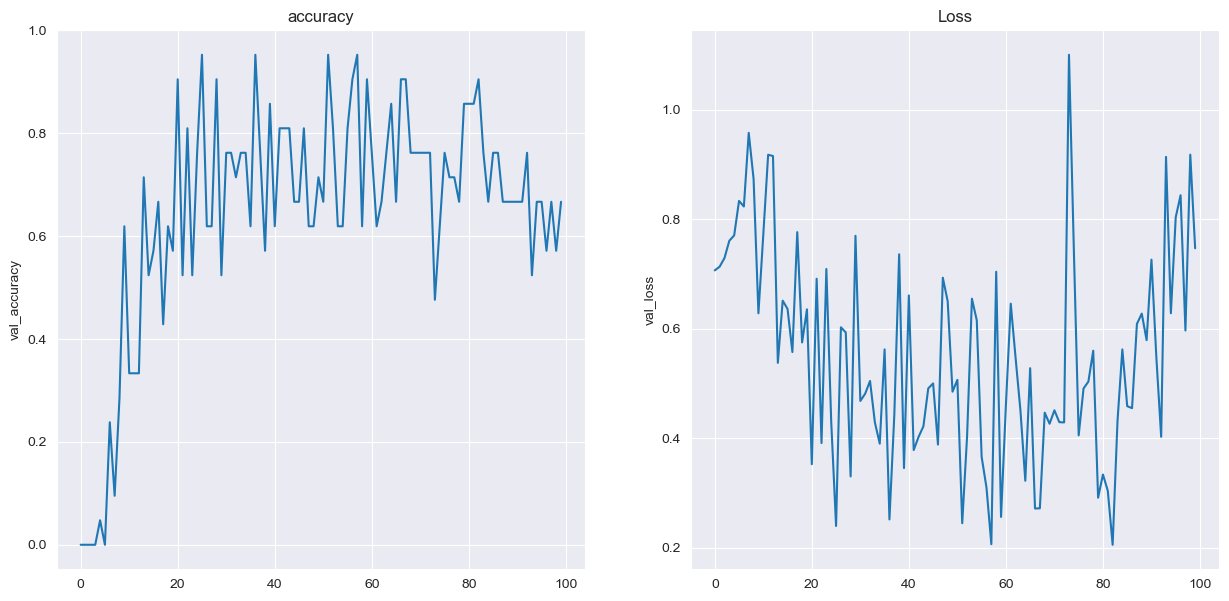

In [14]:
baseline_model = Sequential()
baseline_model.add(Dense(30, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(40, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5322 - loss: 0.6932 - val_accuracy: 0.8571 - val_loss: 0.6930
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5908 - loss: 0.6929 - val_accuracy: 0.0000e+00 - val_loss: 0.6950
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6988 - loss: 0.6920 - val_accuracy: 0.0000e+00 - val_loss: 0.7021
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5617 - loss: 0.6920 - val_accuracy: 0.0000e+00 - val_loss: 0.7029
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6530 - loss: 0.6864 - val_accuracy: 0.8095 - val_loss: 0.6807
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7390 - loss: 0.6680 - val_accuracy: 0.8095 - val_loss: 0.6578
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7484 - loss: 0.6337 - val_accuracy: 0.2381 - val_loss: 0.8022
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7243 - loss: 0.6016 - val_accurac

,accuracy,loss,val_accuracy,val_loss
0,0.486631,0.693135,0.857143,0.692951
1,0.540107,0.692917,0.000000,0.695036
2,0.668449,0.692094,0.000000,0.702088
3,0.663102,0.690237,0.000000,0.702918
4,0.673797,0.683501,0.809524,0.680705
...,...,...,...,...
95,0.951872,0.174020,1.000000,0.091277
96,0.951872,0.164275,0.952381,0.110856
97,0.967914,0.150090,0.904762,0.193195
98,0.957219,0.165954,0.761905,0.374734


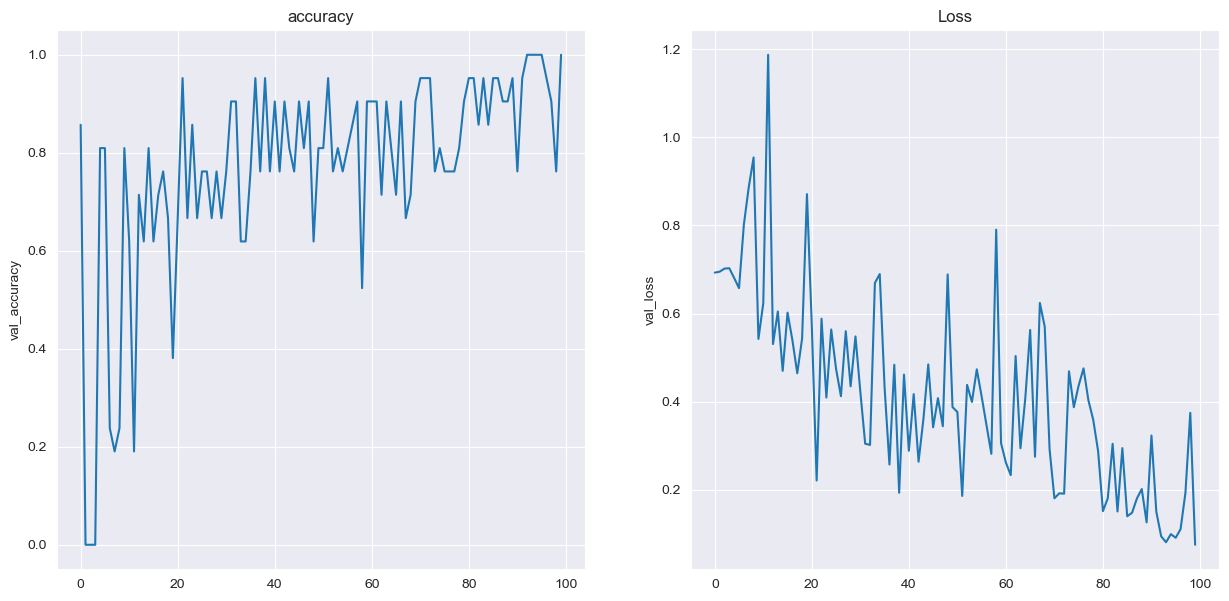

In [15]:
baseline_model = Sequential()
baseline_model.add(Dense(30, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(40, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(15, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5558 - loss: 0.6932 - val_accuracy: 1.0000 - val_loss: 0.6906
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5506 - loss: 0.6928 - val_accuracy: 1.0000 - val_loss: 0.6914
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5678 - loss: 0.6925 - val_accuracy: 0.3810 - val_loss: 0.6932
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7683 - loss: 0.6914 - val_accuracy: 0.8571 - val_loss: 0.6887
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6973 - loss: 0.6873 - val_accuracy: 0.4762 - val_loss: 0.6895
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7434 - loss: 0.6775 - val_accuracy: 0.9524 - val_loss: 0.6489
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7190 - loss: 0.6608 - val_accuracy: 0.8571 - val_loss: 0.6485
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7442 - loss: 0.6175 - val_accuracy: 0.5238 - 

,accuracy,loss,val_accuracy,val_loss
0,0.486631,0.693533,1.000000,0.690615
1,0.481283,0.693084,1.000000,0.691432
2,0.582888,0.692439,0.380952,0.693239
3,0.732620,0.690897,0.857143,0.688668
4,0.700535,0.685901,0.476190,0.689544
...,...,...,...,...
95,0.935829,0.186134,0.571429,0.674372
96,0.935829,0.154740,0.571429,0.886141
97,0.935829,0.159529,0.809524,0.360911
98,0.925134,0.163473,0.809524,0.372792


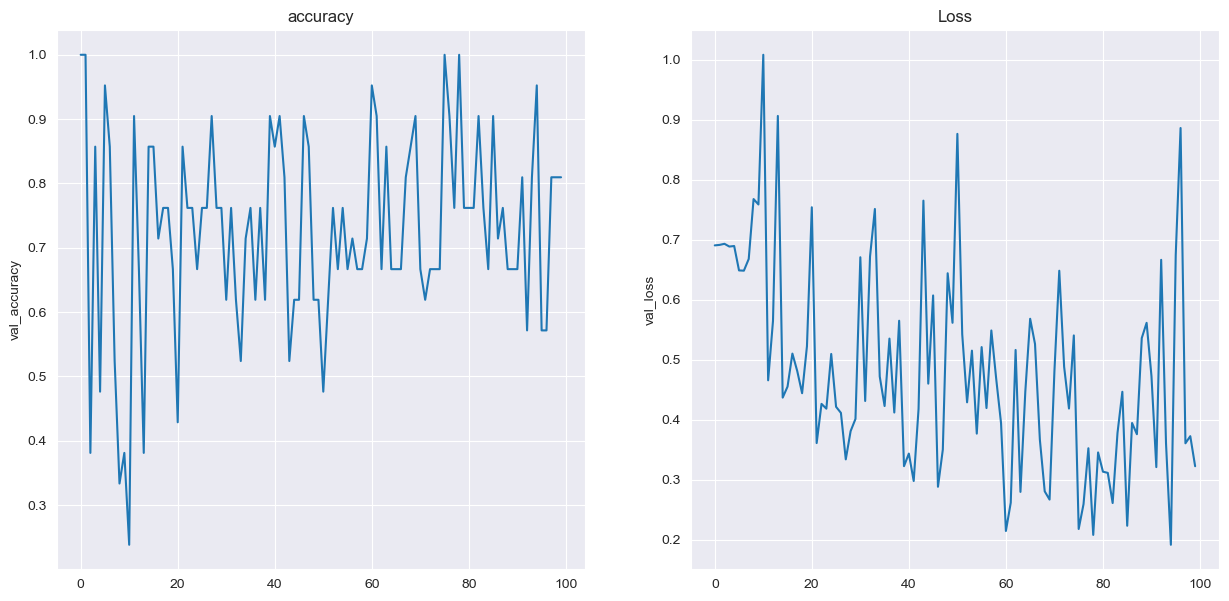

In [16]:
baseline_model = Sequential()
baseline_model.add(Dense(30, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(15, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(40, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.4799 - loss: 0.6932 - val_accuracy: 1.0000 - val_loss: 0.6919
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5049 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.6939
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5256 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.6953
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5350 - loss: 0.6930 - val_accuracy: 0.0000e+00 - val_loss: 0.6950
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5299 - loss: 0.6929 - val_accuracy: 0.0000e+00 - val_loss: 0.6953
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5791 - loss: 0.6922 - val_accuracy: 0.6667 - val_loss: 0.6921
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7146 - loss: 0.6905 - val_accuracy: 1.0000 - val_loss: 0.6796
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6033 - loss: 0.6842 - val_ac

,accuracy,loss,val_accuracy,val_loss
0,0.470588,0.693304,1.000000,0.691899
1,0.491979,0.693152,0.000000,0.693863
2,0.518717,0.693118,0.000000,0.695277
3,0.518717,0.693055,0.000000,0.695002
4,0.518717,0.692813,0.000000,0.695311
...,...,...,...,...
95,0.877005,0.284438,0.714286,0.582501
96,0.903743,0.268166,0.809524,0.439742
97,0.898396,0.257410,0.761905,0.549022
98,0.887701,0.267691,0.857143,0.296326


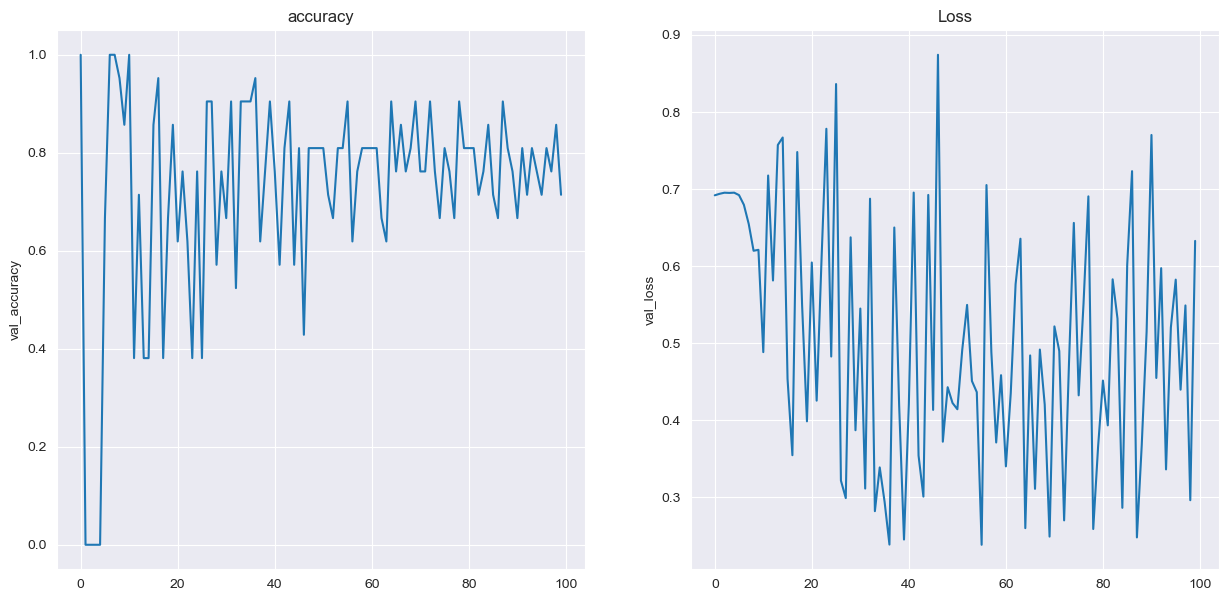

In [17]:
baseline_model = Sequential()
baseline_model.add(Dense(30, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(40, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(5, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(15, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.4528 - loss: 0.6933 - val_accuracy: 0.0000e+00 - val_loss: 0.6945
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5127 - loss: 0.6930 - val_accuracy: 0.0000e+00 - val_loss: 0.6943
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5143 - loss: 0.6927 - val_accuracy: 0.0000e+00 - val_loss: 0.6958
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6896 - loss: 0.6916 - val_accuracy: 0.0476 - val_loss: 0.6997
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6874 - loss: 0.6881 - val_accuracy: 0.1905 - val_loss: 0.7072
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6668 - loss: 0.6772 - val_accuracy: 0.8095 - val_loss: 0.6733
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7075 - loss: 0.6509 - val_accuracy: 0.3810 - val_loss: 0.7109
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6651 - loss: 0.6237 - val_accurac

,accuracy,loss,val_accuracy,val_loss
0,0.475936,0.693258,0.000000,0.694469
1,0.524064,0.692998,0.000000,0.694299
2,0.550802,0.692422,0.000000,0.695829
3,0.705882,0.690921,0.047619,0.699677
4,0.732620,0.685264,0.190476,0.707180
...,...,...,...,...
95,0.919786,0.207552,0.666667,0.613705
96,0.909091,0.244640,0.666667,0.629166
97,0.909091,0.218212,0.761905,0.487174
98,0.919786,0.209700,0.666667,0.588560


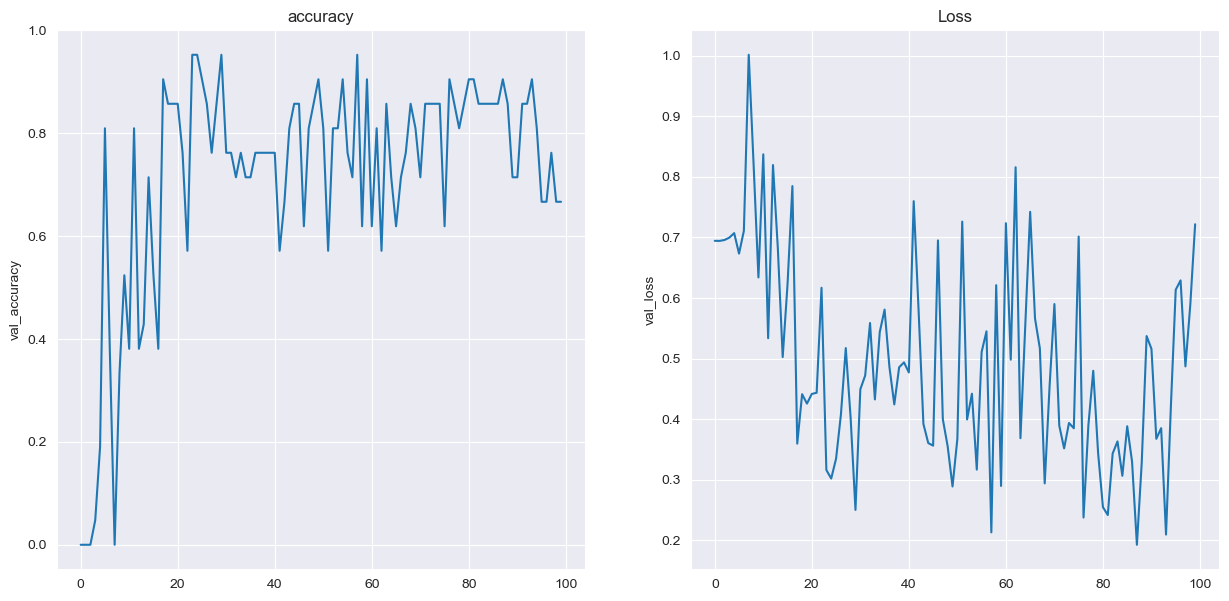

In [18]:
baseline_model = Sequential()
baseline_model.add(Dense(30, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(40, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(15, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4369 - loss: 0.6970 - val_accuracy: 0.3810 - val_loss: 0.6926
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6834 - loss: 0.6849 - val_accuracy: 0.9524 - val_loss: 0.6695
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6843 - loss: 0.6767 - val_accuracy: 0.9048 - val_loss: 0.6618
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6447 - loss: 0.6729 - val_accuracy: 0.3810 - val_loss: 0.7076
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7558 - loss: 0.6516 - val_accuracy: 0.5238 - val_loss: 0.6786
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6977 - loss: 0.6396 - val_accuracy: 0.3333 - val_loss: 0.7252
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7262 - loss: 0.6218 - val_accuracy: 0.3333 - val_loss: 0.7371
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7455 - loss: 0.5904 - val_accuracy: 0.3810 - 

,accuracy,loss,val_accuracy,val_loss
0,0.465241,0.695049,0.380952,0.692639
1,0.647059,0.684201,0.952381,0.669508
2,0.625668,0.678012,0.904762,0.661764
3,0.700535,0.666592,0.380952,0.707638
4,0.711230,0.650871,0.523810,0.678589
...,...,...,...,...
95,0.903743,0.266004,0.857143,0.291924
96,0.903743,0.268388,0.809524,0.316762
97,0.919786,0.265856,0.952381,0.247586
98,0.877005,0.272899,0.666667,0.463045


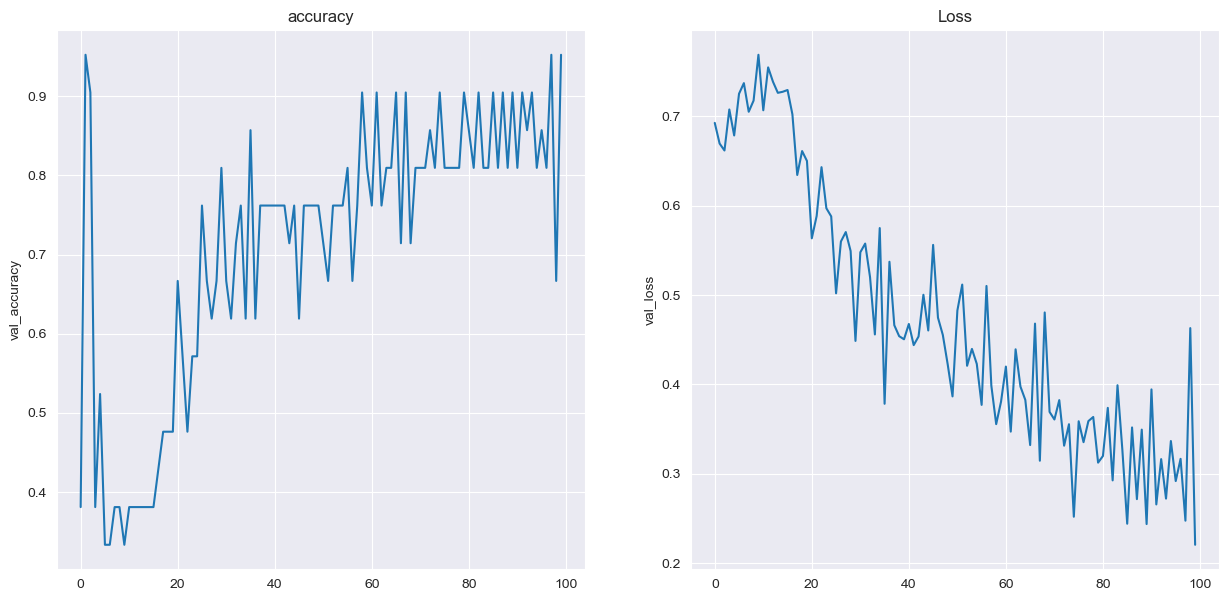

In [19]:
baseline_model = Sequential()
baseline_model.add(Dense(100, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4961 - loss: 0.6917 - val_accuracy: 0.2381 - val_loss: 0.7757
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6720 - loss: 0.6163 - val_accuracy: 0.4286 - val_loss: 0.7354
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7656 - loss: 0.5539 - val_accuracy: 0.9048 - val_loss: 0.5602
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7413 - loss: 0.5113 - val_accuracy: 0.4286 - val_loss: 0.7358
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8295 - loss: 0.4864 - val_accuracy: 0.4286 - val_loss: 0.7819
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7630 - loss: 0.4881 - val_accuracy: 0.9048 - val_loss: 0.4742
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8298 - loss: 0.4264 - val_accuracy: 0.4286 - val_loss: 0.7095
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8369 - loss: 0.4132 - val_accuracy: 0.9048 - 

,accuracy,loss,val_accuracy,val_loss
0,0.572192,0.676199,0.238095,0.775686
1,0.679144,0.603351,0.428571,0.735371
2,0.770053,0.546319,0.904762,0.560223
3,0.754011,0.517586,0.428571,0.735841
4,0.812834,0.477208,0.428571,0.781950
...,...,...,...,...
95,1.000000,0.029719,0.952381,0.124532
96,1.000000,0.027802,0.952381,0.158944
97,1.000000,0.026346,0.952381,0.097968
98,1.000000,0.023765,1.000000,0.080370


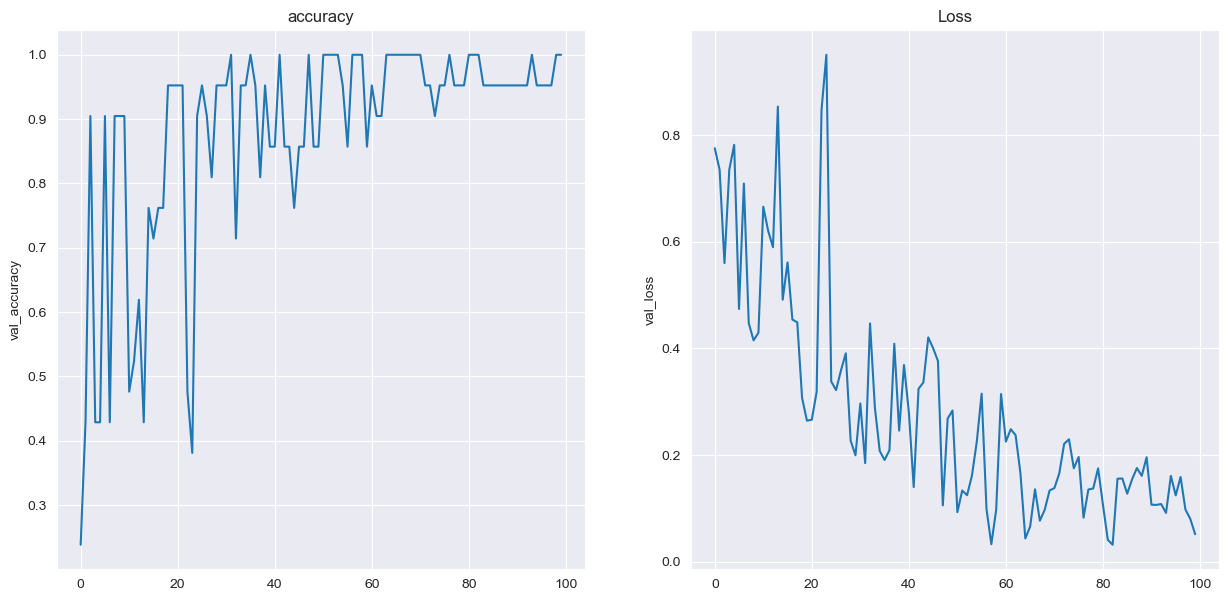

In [20]:
baseline_model = Sequential()
baseline_model.add(Dense(1000, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5364 - loss: 0.6921 - val_accuracy: 0.0000e+00 - val_loss: 0.7171
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5672 - loss: 0.6874 - val_accuracy: 0.0000e+00 - val_loss: 0.7064
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6801 - loss: 0.6850 - val_accuracy: 0.0000e+00 - val_loss: 0.7141
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7521 - loss: 0.6788 - val_accuracy: 0.0000e+00 - val_loss: 0.7458
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6677 - loss: 0.6729 - val_accuracy: 0.5238 - val_loss: 0.6887
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7086 - loss: 0.6619 - val_accuracy: 0.3333 - val_loss: 0.7256
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7267 - loss: 0.6592 - val_accuracy: 0.0000e+00 - val_loss: 0.8050
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7012 - loss: 0.6461 - val

,accuracy,loss,val_accuracy,val_loss
0,0.518717,0.692544,0.000000,0.717094
1,0.534759,0.689322,0.000000,0.706395
2,0.647059,0.685053,0.000000,0.714102
3,0.748663,0.677411,0.000000,0.745818
4,0.657754,0.674210,0.523810,0.688668
...,...,...,...,...
95,0.962567,0.176981,0.714286,0.715961
96,0.962567,0.175917,0.761905,0.604406
97,0.962567,0.173114,0.809524,0.556167
98,0.962567,0.171780,0.809524,0.588875


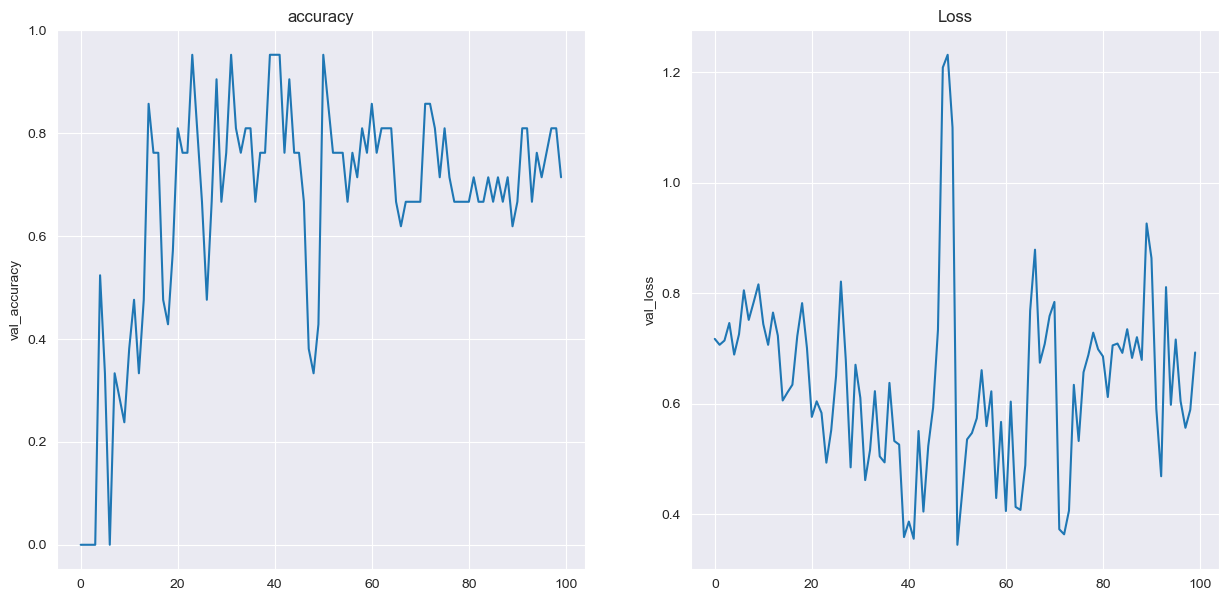

In [21]:
baseline_model = Sequential()
baseline_model.add(Dense(1000, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(5, kernel_initializer='normal', activation='sigmoid'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5350 - loss: 0.8586 - val_accuracy: 0.0000e+00 - val_loss: 1.7590
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7235 - loss: 0.5476 - val_accuracy: 0.6667 - val_loss: 0.5561
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8459 - loss: 0.3366 - val_accuracy: 0.2381 - val_loss: 1.3133
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7443 - loss: 0.4571 - val_accuracy: 0.6190 - val_loss: 0.5898
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8538 - loss: 0.3501 - val_accuracy: 0.4286 - val_loss: 0.7936
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8432 - loss: 0.3301 - val_accuracy: 0.8095 - val_loss: 0.4732
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8523 - loss: 0.3259 - val_accuracy: 0.7143 - val_loss: 0.5042
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9437 - loss: 0.2464 - val_accuracy: 0.857

,accuracy,loss,val_accuracy,val_loss
0,0.609626,0.724667,0.000000,1.759013
1,0.700535,0.570548,0.666667,0.556125
2,0.802139,0.386584,0.238095,1.313305
3,0.818182,0.373214,0.619048,0.589761
4,0.877005,0.315804,0.428571,0.793616
...,...,...,...,...
95,1.000000,0.002622,0.952381,0.095260
96,1.000000,0.003137,0.952381,0.114106
97,1.000000,0.002625,0.952381,0.138556
98,1.000000,0.002358,0.952381,0.204415


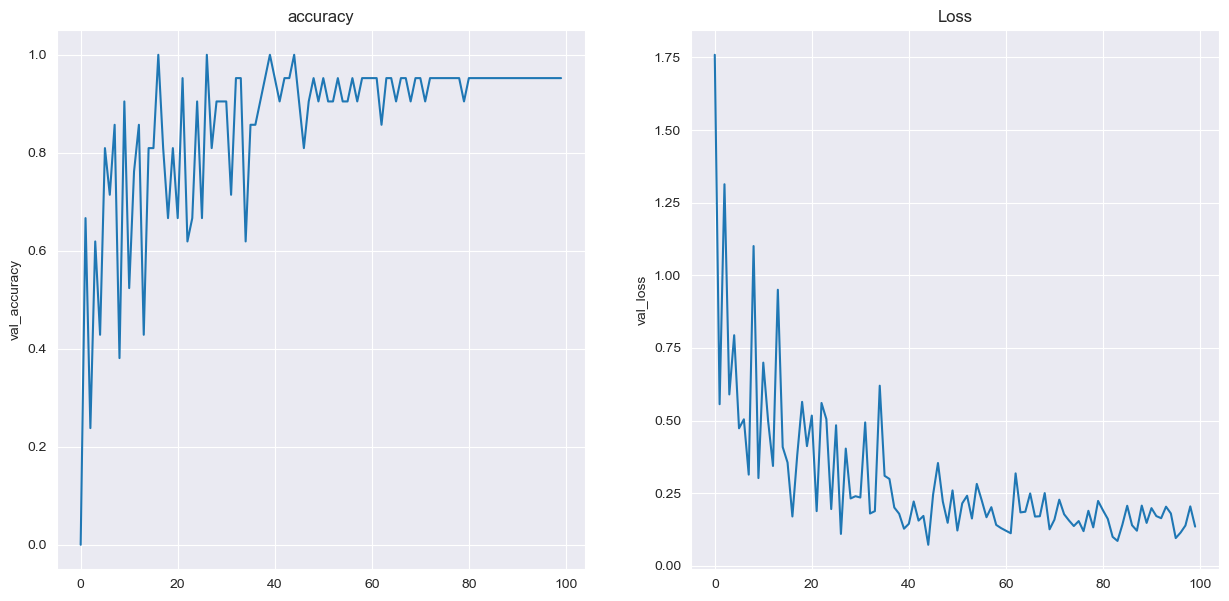

In [22]:
baseline_model = Sequential()
baseline_model.add(Dense(10_000, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

baseline_model = Sequential()
baseline_model.add(Dense(1_000_000, kernel_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5452 - loss: 0.6901 - val_accuracy: 0.5238 - val_loss: 0.7004
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6526 - loss: 0.6642 - val_accuracy: 0.0952 - val_loss: 0.7413
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7166 - loss: 0.6314 - val_accuracy: 0.2381 - val_loss: 0.7538
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7222 - loss: 0.5986 - val_accuracy: 0.2857 - val_loss: 0.7956
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7361 - loss: 0.5643 - val_accuracy: 0.1429 - val_loss: 0.9174
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7688 - loss: 0.5406 - val_accuracy: 0.3333 - val_loss: 0.7844
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8106 - loss: 0.4755 - val_accuracy: 0.3810 - val_loss: 0.7913
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7538 - loss: 0.5107 - val_accuracy: 0.4286 - 

,accuracy,loss,val_accuracy,val_loss
0,0.609626,0.682315,0.523810,0.700364
1,0.700535,0.650205,0.095238,0.741340
2,0.721925,0.618005,0.238095,0.753828
3,0.743316,0.584633,0.285714,0.795553
4,0.732620,0.566316,0.142857,0.917438
...,...,...,...,...
95,1.000000,0.026944,0.904762,0.195042
96,1.000000,0.027185,0.904762,0.147452
97,0.994652,0.030136,1.000000,0.087941
98,1.000000,0.026678,0.904762,0.168483


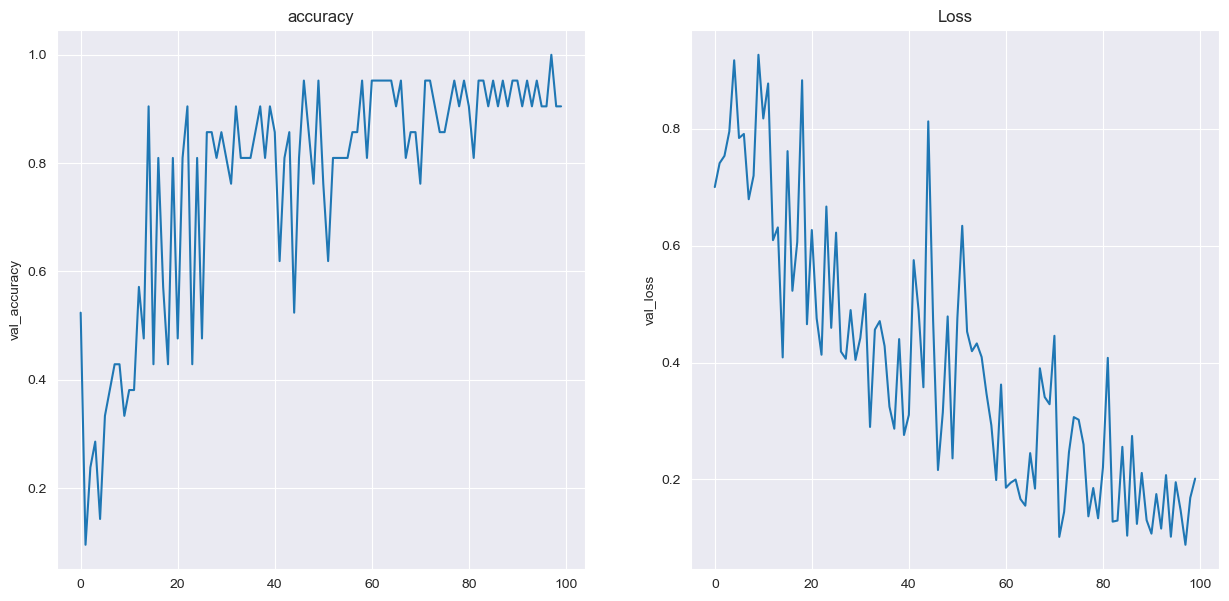

In [23]:
baseline_model = Sequential()
baseline_model.add(Dense(60, bias_initializer='normal', activation='relu'))
baseline_model.add(Dense(40, bias_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, bias_initializer='normal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

create_error_report(baseline_model)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - binary_accuracy: 0.5656 - loss: 0.6767 - val_binary_accuracy: 0.5238 - val_loss: 0.6952
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.6515 - loss: 0.6493 - val_binary_accuracy: 0.6667 - val_loss: 0.6687
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.6817 - loss: 0.6249 - val_binary_accuracy: 0.3333 - val_loss: 0.7764
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7317 - loss: 0.5943 - val_binary_accuracy: 0.3333 - val_loss: 0.7832
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7283 - loss: 0.5826 - val_binary_accuracy: 0.4762 - val_loss: 0.7213
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7446 - loss: 0.5556 - val_binary_accuracy: 0.2381 - val_loss: 0.8776
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7548 - loss: 0.5456 - val_binary_accuracy: 0.3810 - val_loss: 0.7910
Epoch 8/100


,binary_accuracy,loss,val_binary_accuracy,val_loss
0,0.534759,0.680679,0.523810,0.695150
1,0.679144,0.641155,0.666667,0.668742
2,0.705882,0.614488,0.333333,0.776399
3,0.727273,0.591811,0.333333,0.783168
4,0.721925,0.576519,0.476190,0.721308
...,...,...,...,...
95,1.000000,0.018184,0.952381,0.090863
96,1.000000,0.018307,0.952381,0.073067
97,1.000000,0.016445,0.952381,0.094481
98,1.000000,0.016196,0.952381,0.093492


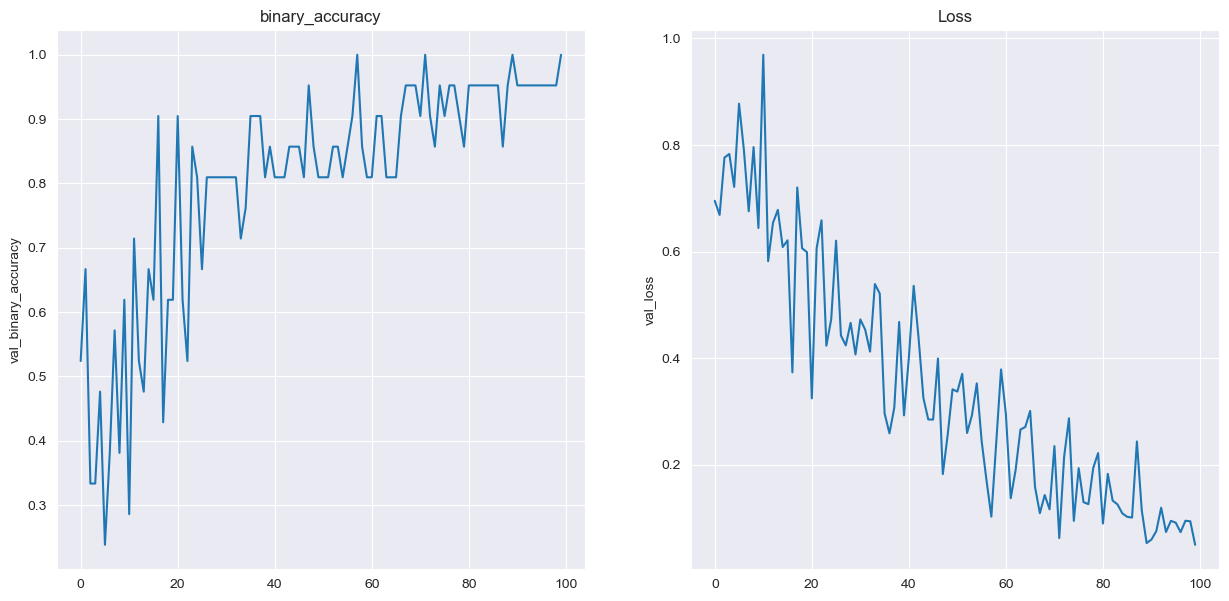

In [36]:
baseline_model = Sequential()
baseline_model.add(Dense(60, bias_initializer='normal', kernel_initializer='HeNormal', activation='relu'))
baseline_model.add(Dense(40, bias_initializer='normal', activation='relu'))
baseline_model.add(Dense(1, bias_initializer='normal', kernel_initializer='HeNormal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

create_error_report(baseline_model, metrics='binary_accuracy')

Epoch 1/100


C:\Users\sanya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - binary_accuracy: 0.5137 - loss: 0.7031 - val_binary_accuracy: 1.0000 - val_loss: 0.6241
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6443 - loss: 0.6685 - val_binary_accuracy: 0.1429 - val_loss: 0.7357
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.6645 - loss: 0.6497 - val_binary_accuracy: 0.1905 - val_loss: 0.7438
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6923 - loss: 0.6326 - val_binary_accuracy: 0.2381 - val_loss: 0.7338
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7222 - loss: 0.6326 - val_binary_accuracy: 0.0000e+00 - val_loss: 0.8450
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7405 - loss: 0.6069 - val_binary_accuracy: 0.3333 - val_loss: 0.7387
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.6998 - loss: 0.6092 - val_binary_accuracy: 0.1429 - val_loss: 0.8060
Epoch 8/100
19/19 ━━

,binary_accuracy,loss,val_binary_accuracy,val_loss
0,0.556150,0.687822,1.000000,0.624068
1,0.614973,0.663400,0.142857,0.735691
2,0.641711,0.649529,0.190476,0.743789
3,0.684492,0.638795,0.238095,0.733832
4,0.689840,0.632908,0.000000,0.845011
...,...,...,...,...
95,0.850267,0.340191,0.857143,0.430270
96,0.860963,0.330836,0.904762,0.349004
97,0.850267,0.334807,0.904762,0.378600
98,0.860963,0.332205,0.857143,0.430329


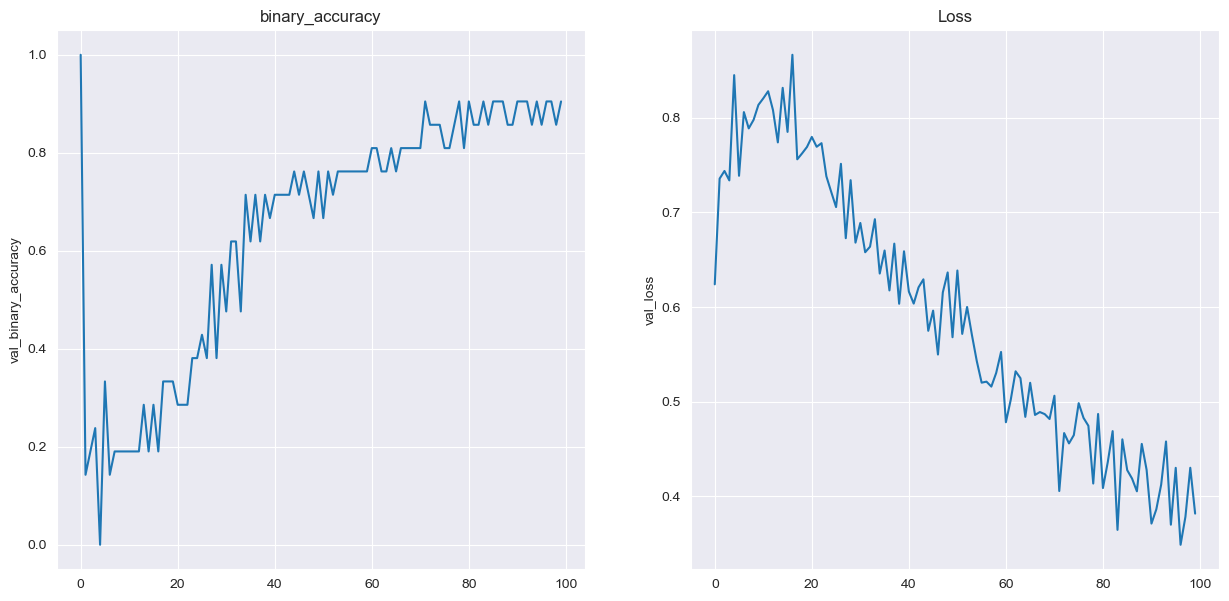

In [71]:
baseline_model = Sequential()
baseline_model.add(Dense(60, bias_initializer='normal', kernel_initializer='HeNormal', input_dim=30, activation='relu'))
baseline_model.add(Dense(1, bias_initializer='normal', kernel_initializer='HeNormal', activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

create_error_report(baseline_model, metrics='binary_accuracy', dataset=create_dataset(size=30))

In [67]:
df, X, y = create_dataset(size=30)

In [68]:
print(len(df), len(X), len(y), sep='\n')

208
208
208


array([[0.02  , 0.0371, 0.0428, ..., 0.808 , 0.6791, 0.3857],
       [0.0453, 0.0523, 0.0843, ..., 0.2767, 0.4423, 0.2028],
       [0.0262, 0.0582, 0.1099, ..., 0.8533, 0.6036, 0.8514],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 1.    , 0.863 , 0.6979],
       [0.0303, 0.0353, 0.049 , ..., 0.8297, 0.7032, 0.7141],
       [0.026 , 0.0363, 0.0136, ..., 0.7603, 0.7123, 0.8358]])